# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
data_path = "drive/MyDrive/Homeworks/yulu_bike_sharing_dataset.csv"
df = pd.read_csv(data_path)
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [3]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

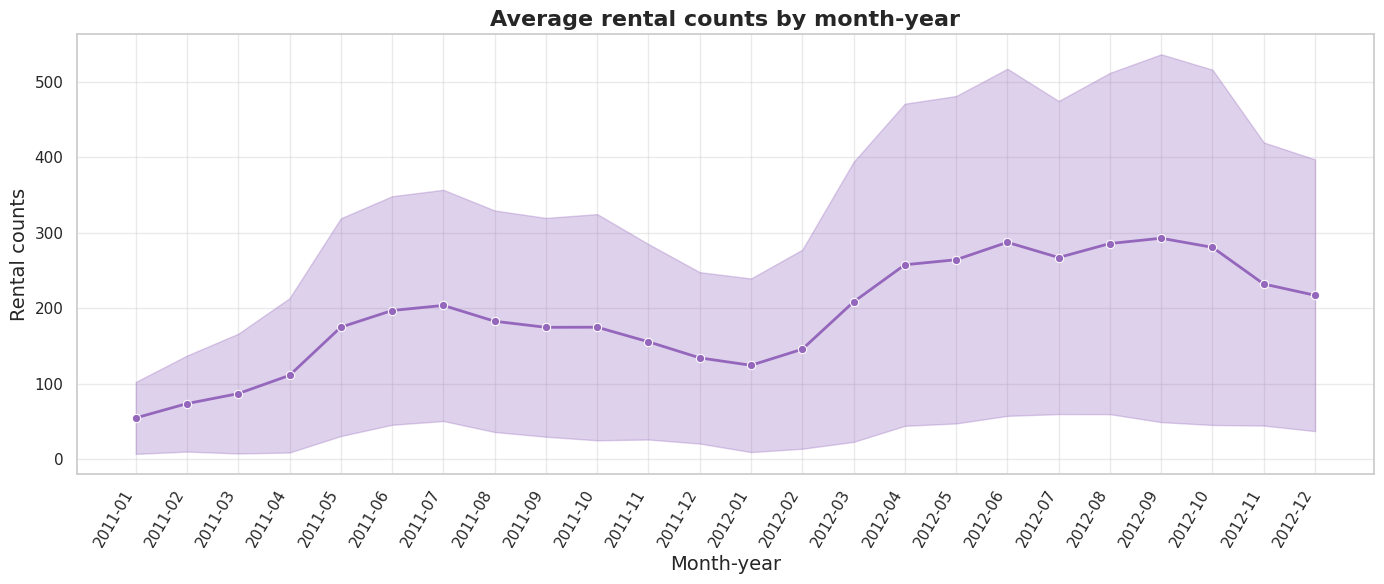

In [4]:
monthly = df.groupby('month_year')['count'].agg(['mean', 'std']).reset_index()
monthly = monthly.sort_values('month_year')

plt.figure(figsize=(14, 6))

sns.lineplot(
    data=monthly,
    x='month_year',
    y='mean',
    marker='o',
    linewidth=2,color='tab:purple'
)

plt.fill_between(
    monthly['month_year'],
    monthly['mean'] - monthly['std'],
    monthly['mean'] + monthly['std'],
    alpha=0.3, color='tab:purple',
)

plt.title("Average rental counts by month-year", fontsize=16, fontweight='bold')
plt.xlabel("Month-year", fontsize=14)
plt.ylabel("Rental counts", fontsize=14)

plt.xticks(rotation=60, ha='right')
plt.grid(True, alpha=0.4)

plt.tight_layout()
plt.show();


The months from approximately 2012-07 (July 2012) to 2012-11 (November 2012) - the shaded area reaches its maximum width.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

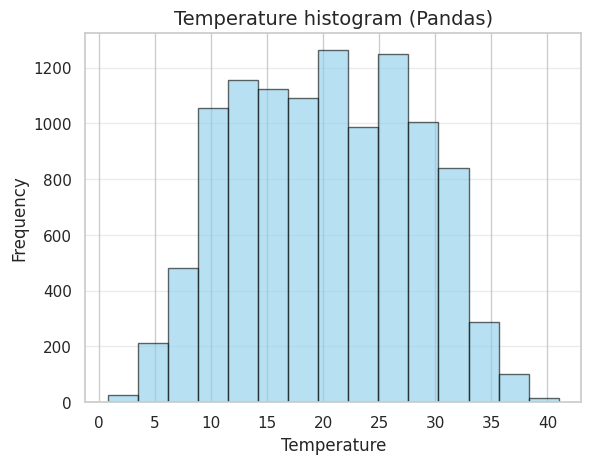

In [5]:
df['temp'].plot.hist(
    bins=15,
    alpha=0.6,
    color='skyblue',
    edgecolor='black'
)
plt.title("Temperature histogram (Pandas)", fontsize=14)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.4)
plt.show();

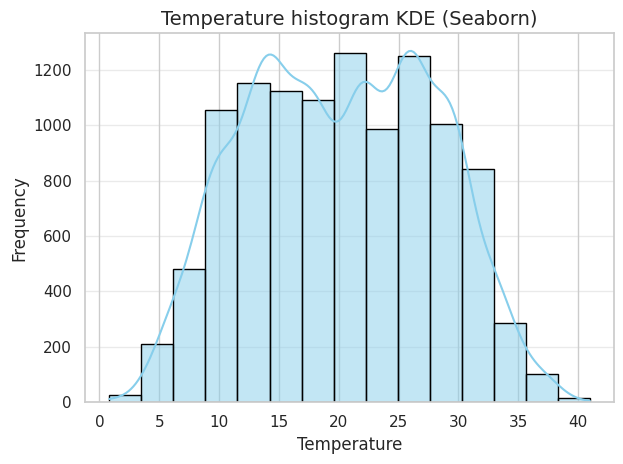

In [6]:
sns.histplot(
    data=df,
    x='temp',
    bins=15,
    kde=True,
    color='skyblue',
    edgecolor='black'
)
plt.title("Temperature histogram KDE (Seaborn)", fontsize=14)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.4)

plt.tight_layout()
plt.show()

1. Kernel Density Estimate (KDE) is reflected in Seaborn histogram - a smooth line.

2. KDE shows the overall shape of distribution, not the exact counts. It is more smooth, not blocky as histogram.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

<Figure size 1000x500 with 0 Axes>

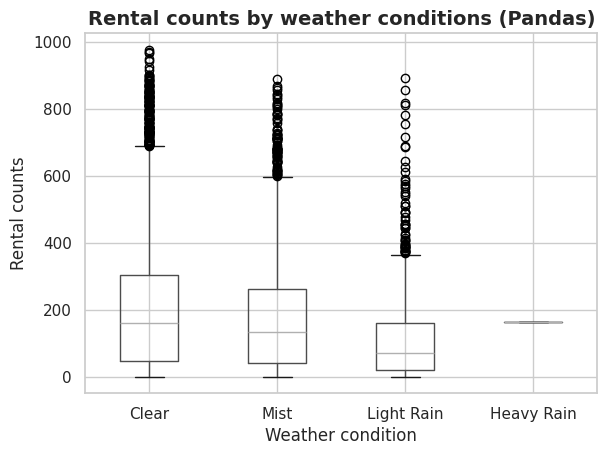

In [7]:
weather_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}

plt.figure(figsize=(10, 5))

df.boxplot(column='count', by='weather', grid=True)
plt.xticks([1, 2, 3, 4], [weather_labels[i] for i in range(1,5)])

plt.title('Rental counts by weather conditions (Pandas)', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Weather condition', fontsize=12)
plt.ylabel('Rental counts', fontsize=12)

plt.show();

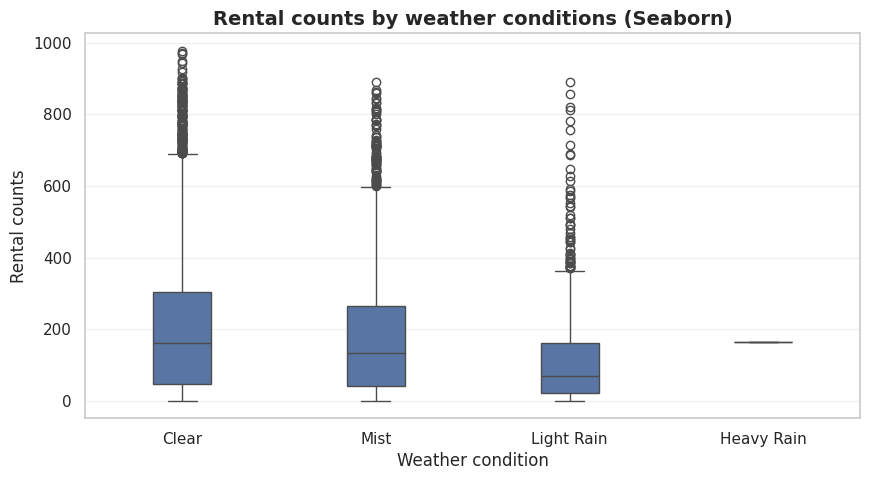

In [8]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    data=df,
    x='weather',
    y='count',
    width=0.3
)

plt.xticks([0, 1, 2, 3], [weather_labels[i] for i in range(1,5)])

plt.title('Rental counts by weather conditions (Seaborn)', fontsize=14, fontweight='bold')
plt.xlabel('Weather condition', fontsize=12)
plt.ylabel('Rental counts', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.show();


In Seaborn the colors are applied by default, boxplots look neat, it is better suited for large and complex datasets. With Pandas - minimal styling, it gives basic boxplot and customization is limited in comparison with Seaborn.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


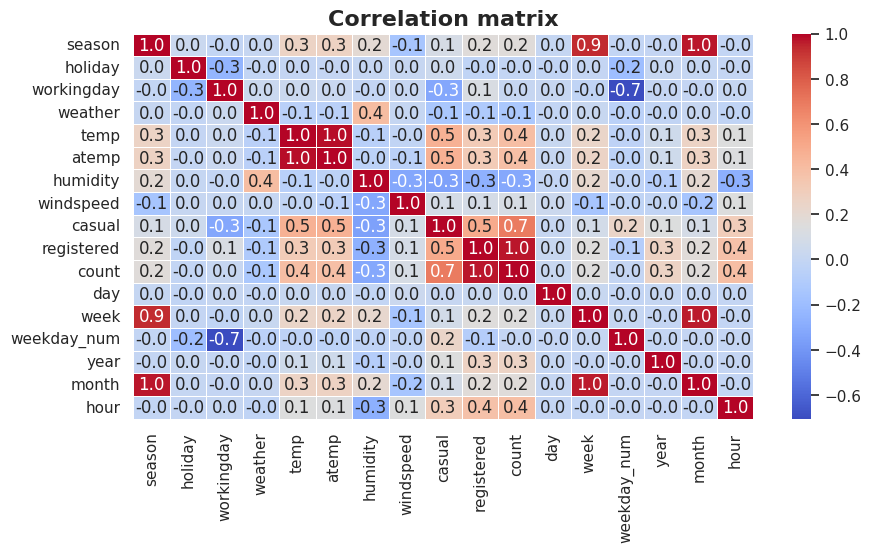

In [9]:
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar=True
)

plt.title("Correlation matrix", fontsize=16, fontweight='bold')
plt.show();


1. Registered, casual, temp, atemp.

2. Correlation between temp and atemp equals 1, it is ideal positive correlation. Atemp is calculated based on temperature.

3. Sample of negative correlations: workingday vs holiday; weather vs temp, humidity vs atemp, workingday vs casual, weekday_num vs holiday.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


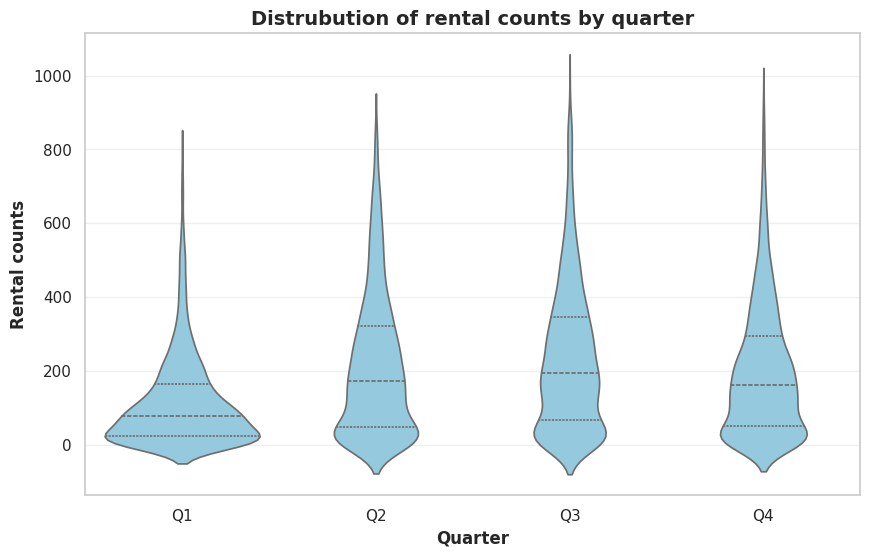

In [10]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df,
    x='season',
    y='count',
    color='skyblue',
    inner='quartile'
)

plt.xlabel('Quarter', fontsize=12, fontweight='bold')
plt.ylabel('Rental counts', fontsize=12, fontweight='bold')
plt.title('Distrubution of rental counts by quarter', fontsize=14, fontweight='bold')

plt.xticks([0, 1, 2, 3], ['Q1', 'Q2', 'Q3', 'Q4'])

plt.grid(axis='y', alpha=0.3)
plt.show();


1. The thickness represents the density of the data; wide section represents where
the large number of data points is concentrated.

2. The violin plot is the tallest at Q3.

3. The violin plot displays the full shape of the data distribution (good to represent skewed distributions), can show if the distribution is bimodal - having 2 peaks.




## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

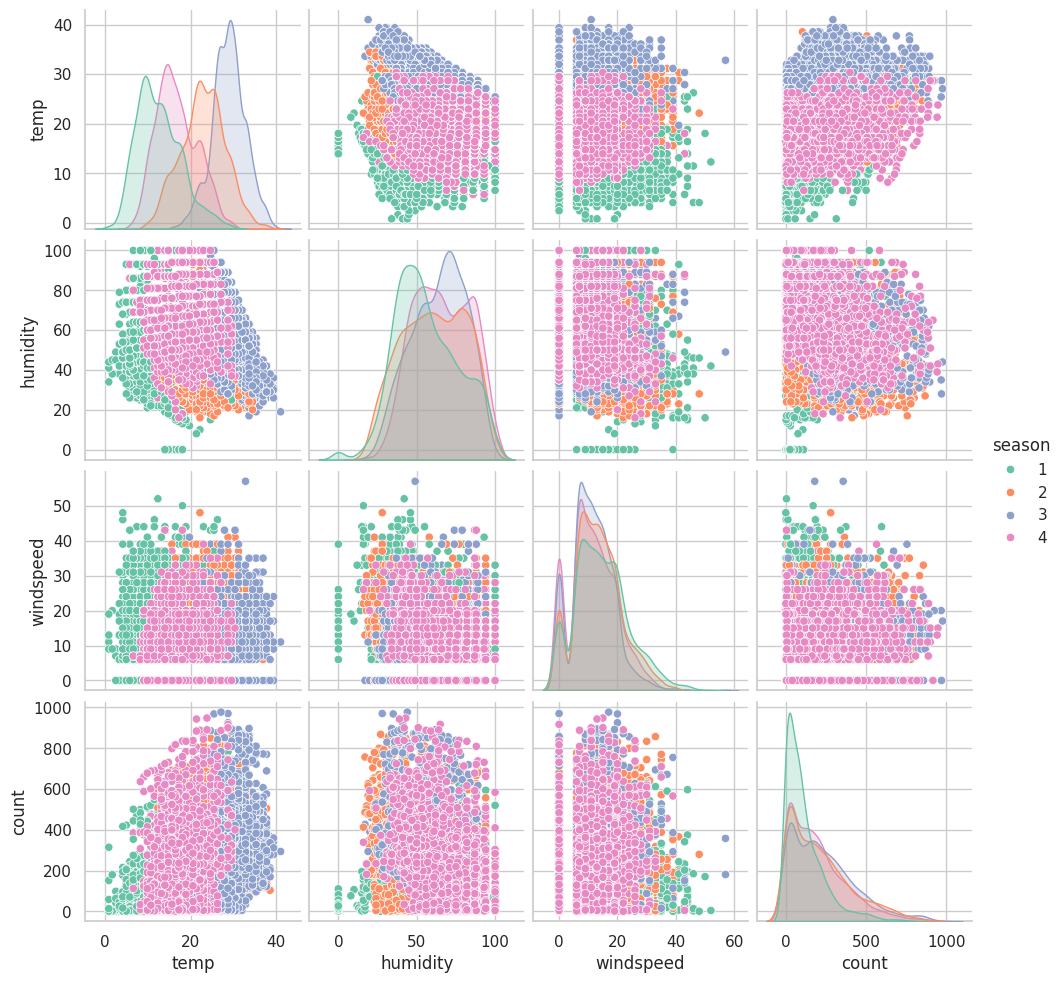

In [11]:
sns.set(style="whitegrid")

sns.pairplot(
    df[['temp', 'humidity', 'windspeed', 'count', 'season']],
    vars=['temp', 'humidity', 'windspeed', 'count'],
    hue='season',
    palette='Set2'
)

plt.show();


1. Temperature and count - strong positive correlation, with the temperature increase the count also increases.

2. Temperature differs the most between seasons (quarters).

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

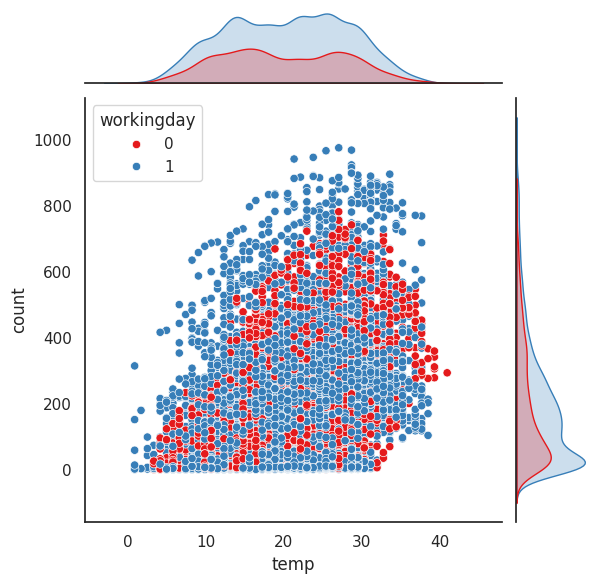

In [12]:
sns.set(style="white")

sns.jointplot(
    data=df,
    x="temp",
    y="count",
    hue="workingday",
    kind="scatter",
    palette="Set1"
)

plt.show()

1. The plot along the x-axix shows the distribution of the variable temperature. The temperature distribution is roughly the same on both working and non-working days.The plot along the y-axis shows the distribution of the variable count. The number of users on working days tends to be higher compared to non-working days.

2. Yes, there is a difference. The highest rental counts (around 800-1000) are predominantly observed on working days, at moderate temperatures. Overall, working days demonstrate higher user activity.